<a href="https://colab.research.google.com/github/daegeunbae/daegeunbae/blob/main/240705_%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A14_%EB%82%98%EC%9D%B4%EB%B8%8C%EB%B2%A0%EC%9D%B4%EC%A6%88_%EC%97%B0%EA%B4%80%EA%B7%9C%EC%B9%99_Apriori_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나이브 베이즈를 이용한 문서 분류

## 1. 뉴스 그룹 데이터 가져오기

In [1]:
#
from sklearn.datasets import fetch_20newsgroups

newsdata=fetch_20newsgroups(subset="train")
print (newsdata.keys())


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [2]:
print(len(newsdata.data), len(newsdata.filenames), len(newsdata.target_names), len(newsdata.target))

11314 11314 20 11314


In [3]:
newsdata.target[0:3]

array([7, 4, 4])

In [4]:
newsdata.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

## 2. 훈련 검증 분리

In [6]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(newsdata.data, newsdata.target, test_size=0.2, random_state=0)

## 3. 카운트 벡터 만들기

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english")
cv.fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv=cv.transform(X_test)
X_train_cv.shape, X_test_cv.shape

((9051, 114472), (2263, 114472))

## 나이브 베이즈 모델 적용

In [8]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)
print("훈련:",nb.score(X_train_cv, y_train))
print("테스트:",nb.score(X_test_cv, y_test))

훈련: 0.9505027068832174
테스트: 0.8581528943879806


# 연관규칙(장바구니 분석)

## 영수증 테이블 만들기

In [9]:
dataset=[[ "사과", "치즈","생수" ],[ "생수", "호두" , "치즈", "고등어"],
 [ "수박", "사과", '생수' ],[ "생수", "호두" , "치즈", "옥수수" ]]

In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import apriori, association_rules
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_array, columns=te.columns_)
df


,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


## APRIORI 알고리즘 적용

1.자주 발생하는 단일 항목 집합 찾기 (L1 생성):

2.자주 발생하는 항목 집합의 확장 (Lk 생성):

3.빈발 항목 집합의 후보 생성 (Ck 생성):

4.빈발 항목 집합을 기반으로 연관 규칙 생성:

In [11]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_items=apriori(df, min_support=0.3, use_colnames=True)
frequent_items

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(생수, 치즈)"
6,0.50,"(호두, 생수)"
7,0.50,"(호두, 치즈)"
8,0.50,"(호두, 생수, 치즈)"


In [12]:
association_rules(frequent_items,  min_threshold=0.3).to_csv("연관규칙 결과.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
association_rules(frequent_items,  min_threshold=0.3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
1,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0,0.0
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf,0.0
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
6,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
7,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
8,"(호두, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
9,"(호두, 치즈)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0


## 연관 규칙 실습

In [14]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

data_df=pd.read_csv("/content/drive/MyDrive/02.coding/01_3.수요예측/연관분석 예제1.csv")
data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Key,Item
0,2016-10-30,1,Bread
1,2016-10-30,2,Scandinavian
2,2016-10-30,2,Scandinavian
3,2016-10-30,3,Hot chocolate
4,2016-10-30,3,Jam


In [16]:
data_df["Key"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Key
482     8
382     7
1264    6
346     6
1158    6
       ..
974     1
978     1
979     1
386     1
1       1
Name: count, Length: 1385, dtype: int64

In [17]:
data_df["Item"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item
Coffee                    753
Bread                     442
Tea                       197
Pastry                    149
Medialuna                 126
Brownie                   112
Muffin                    109
Scandinavian               87
Farm House                 87
Alfajores                  85
Soup                       77
NONE                       75
Hot chocolate              67
Hearty & Seasonal          65
Cookies                    64
Sandwich                   53
Jam                        47
Fudge                      46
Juice                      39
Cake                       39
Tartine                    34
Mineral water              26
Keeping It Local           24
Frittata                   23
Truffles                   23
Focaccia                   21
Coke                       20
Pick and Mix Bowls         12
Mighty Protein             11
My-5 Fruit Shoot           11
Art Tray                    9
Kids biscuit                8
Empanadas                   7
Ella'

In [18]:
list(data_df[data_df["Key"]==1]["Item"].values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Bread']

In [19]:
list(data_df[data_df["Key"]==2]["Item"].values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Scandinavian', 'Scandinavian']

In [20]:
list(data_df[data_df["Key"]==3]["Item"].values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Hot chocolate', 'Jam', 'Cookies']

In [21]:
receits=[list(data_df[data_df["Key"]==i]["Item"].values) for i in range(data_df["Key"].max()) if i in data_df["Key"].values]
receits[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

In [22]:
#TransactionEncoding
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(receits).transform(receits)
df=pd.DataFrame(te_ary, columns=te.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adjustment,Alfajores,Art Tray,Bacon,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brownie,Cake,...,Sandwich,Scandinavian,Smoothies,Soup,Spread,Tartine,Tea,The BART,Truffles,Victorian Sponge
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# apriori(min_support=0.01)
from mlxtend.frequent_patterns import apriori, association_rules
frequent_items=apriori(df, min_support=0.01, use_colnames=True)
frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.056358,(Alfajores)
1,0.304913,(Bread)
2,0.080925,(Brownie)
3,0.028179,(Cake)
4,0.455202,(Coffee)
...,...,...
60,0.012283,"(Pastry, Tea)"
61,0.012283,"(Soup, Tea)"
62,0.010116,"(Brownie, Coffee, Bread)"
63,0.013728,"(Bread, Coffee, Medialuna)"


In [24]:
# association rule
association_rules(frequent_items, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Coffee),(Alfajores),0.455202,0.056358,0.028902,0.063492,1.126577,0.003247,1.007617,0.206233
1,(Alfajores),(Coffee),0.056358,0.455202,0.028902,0.512821,1.126577,0.003247,1.118269,0.119066
2,(Bread),(Jam),0.304913,0.033960,0.012283,0.040284,1.186246,0.001929,1.006590,0.225877
3,(Jam),(Bread),0.033960,0.304913,0.012283,0.361702,1.186246,0.001929,1.088969,0.162524
4,(Bread),(Medialuna),0.304913,0.085260,0.026734,0.087678,1.028356,0.000737,1.002650,0.039670
5,(Medialuna),(Bread),0.085260,0.304913,0.026734,0.313559,1.028356,0.000737,1.012595,0.030144
6,(Bread),(NONE),0.304913,0.052023,0.015896,0.052133,1.002106,0.000033,1.000116,0.003024
7,(NONE),(Bread),0.052023,0.304913,0.015896,0.305556,1.002106,0.000033,1.000925,0.002217
8,(Bread),(Pastry),0.304913,0.103324,0.034682,0.113744,1.100852,0.003177,1.011758,0.131800
9,(Pastry),(Bread),0.103324,0.304913,0.034682,0.335664,1.100852,0.003177,1.046288,0.102169


In [25]:
association_rules(frequent_items, metric="lift", min_threshold=1).to_csv("연관규칙 결과.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 시계열

In [28]:
import pandas as pd
fish=pd.read_csv("/content/drive/MyDrive/02.coding/01_3.수요예측/catfish.csv")
fish.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239


In [29]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    324 non-null    object
 1   Total   324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
fish=pd.read_csv("/content/drive/MyDrive/02.coding/01_3.수요예측/catfish.csv", parse_dates=[0], index_col=0)
fish.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Date'>

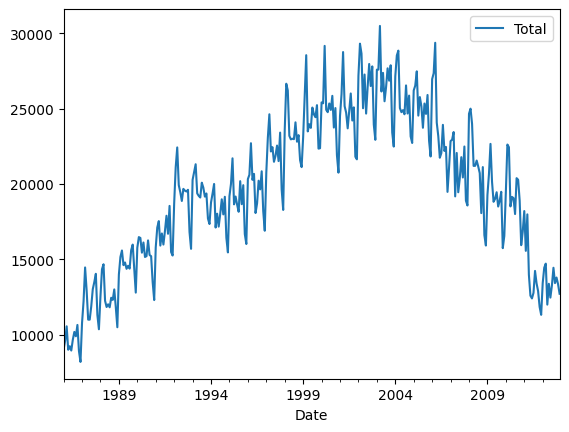

In [33]:
fish.plot()

## 시계열 분해

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


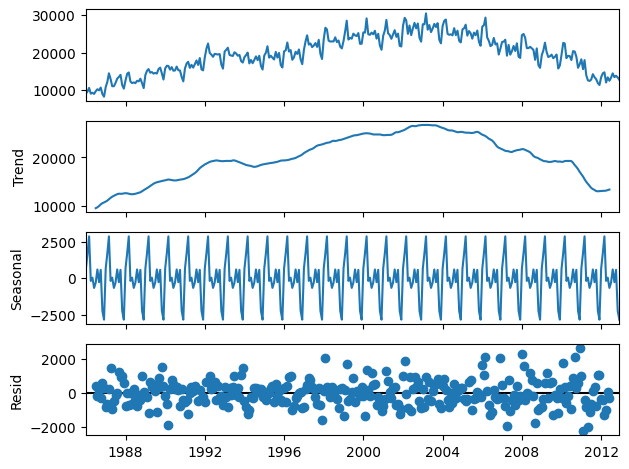

In [34]:
# 시계열 분해(statmodels)
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(fish, model="additive", period=12)
result.plot()
plt.show()

In [35]:
result.trend[10:300]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date
1986-11-01    10581.666667
1986-12-01    10740.458333
1987-01-01    10917.833333
1987-02-01    11127.875000
1987-03-01    11395.833333
                  ...     
2010-08-01    18900.541667
2010-09-01    18421.083333
2010-10-01    18046.666667
2010-11-01    17584.875000
2010-12-01    17034.625000
Name: trend, Length: 290, dtype: float64

## 오토 아리마로 시계열 예측하기

In [36]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(fish, shuffle=False, test_size= 0.2)
# 오토 아리마


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
!pip install pmdarima

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.a

Auto-ARIMA Model Order: (0, 1, 2)
Auto-ARIMA Seasonal Order: (1, 0, 1, 12)


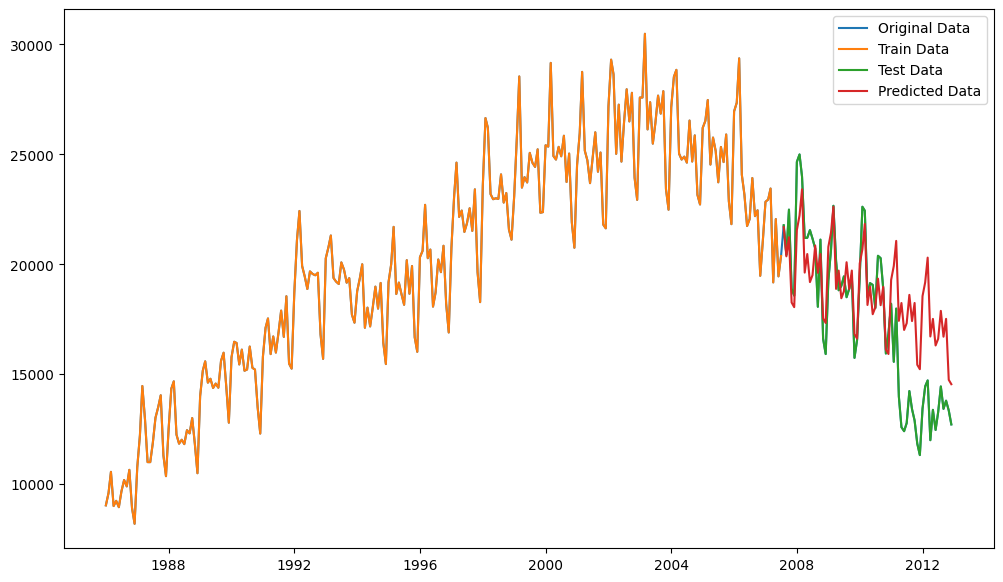

In [38]:
# prompt: 오토 아리마 시계열 예측

import matplotlib.pyplot as plt
from pmdarima import auto_arima
model = auto_arima(train, seasonal=True, m=12)

print("Auto-ARIMA Model Order:", model.order)
print("Auto-ARIMA Seasonal Order:", model.seasonal_order)

model.fit(train)

forecast = pd.DataFrame(model.predict(len(test)), columns=["Forecast"], index=test.index)

plt.figure(figsize=(12, 7))
plt.plot(fish, label='Original Data')
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(forecast, label='Predicted Data')
plt.legend()
plt.show()


In [39]:
import numpy as np
np.abs(forecast.values-test.values).sum()/len(test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2019.7587423898813

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Auto-ARIMA Model Order: (0, 1, 2)
Auto-ARIMA Seasonal Order: (1, 0, 1, 12)


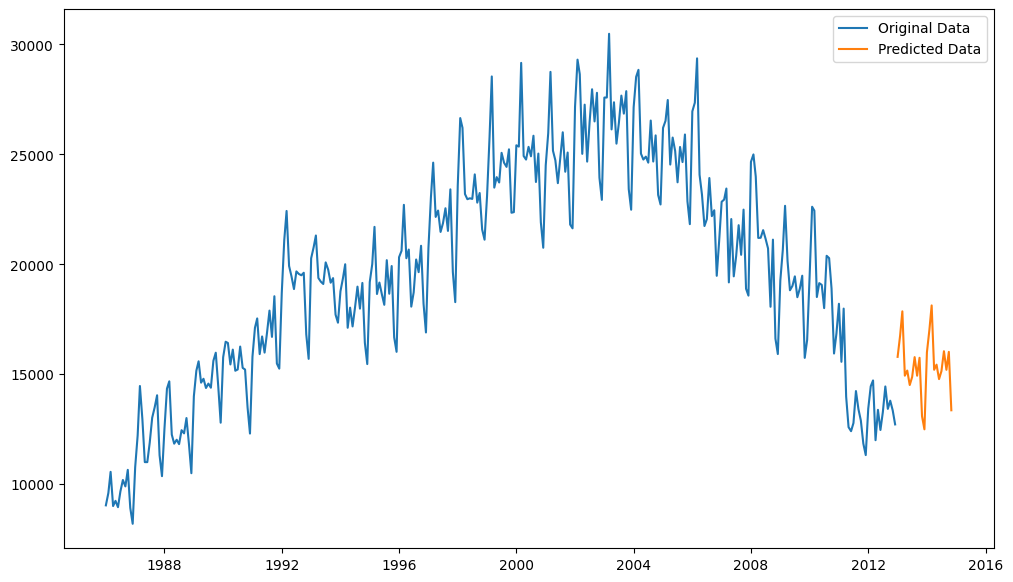

In [40]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pmdarima import auto_arima
model = auto_arima(train, seasonal=True, m=12)

print("Auto-ARIMA Model Order:", model.order)
print("Auto-ARIMA Seasonal Order:", model.seasonal_order)

model.fit(fish)

forecast = pd.DataFrame(model.predict(24), index=pd.date_range(fish.index[-1], periods=24, freq='MS'))

plt.figure(figsize=(12, 7))
plt.plot(fish, label='Original Data')

#plt.plot(test, label='Test Data')
plt.plot(forecast, label='Predicted Data')
plt.legend()
plt.show()

In [41]:
model.predict(24)

2013-01-01    15787.938735
2013-02-01    16752.851191
2013-03-01    17859.678709
2013-04-01    14932.120746
2013-05-01    15165.398658
2013-06-01    14507.739975
2013-07-01    14872.767431
2013-08-01    15776.092031
2013-09-01    14931.288228
2013-10-01    15746.250661
2013-11-01    13090.073860
2013-12-01    12492.894349
2014-01-01    15993.949923
2014-02-01    17021.665553
2014-03-01    18128.410688
2014-04-01    15201.070628
2014-05-01    15434.331177
2014-06-01    14776.721444
2014-07-01    15141.721731
2014-08-01    16044.979094
2014-09-01    15200.238172
2014-10-01    16015.139946
2014-11-01    13359.160849
2014-12-01    12762.025786
Freq: MS, dtype: float64

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  324
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -2691.661
Date:                              Fri, 05 Jul 2024   AIC                           5393.323
Time:                                      04:44:59   BIC                           5412.211
Sample:                                  01-01-1986   HQIC                          5400.863
                                       - 12-01-2012                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3502      0.015    -22.961      0.000      -0.380      -0.320
ma.L2         -0.0961      0.004    -22.914      0.000      -0.104      -0.088
ar.S.L12       0.9999      0.000   3905.677      0.000       0.999       1.000
ma.S.L12      -0.9847      0.030    -33.311      0.000      -1.043      -0.927
sigma2      9.233e+05   1.33e-08   6.94e+13      0.000    9.23e+05    9.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                12.11
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.53e+29. Standard errors may be unstable.
"""

In [43]:
# 수치 검증: 결정계수(r2_score, mae)

In [44]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(fish, model="additive", period=12)


## 이동창 메소드를 이용한 트렌드 추출

<Axes: xlabel='Date'>

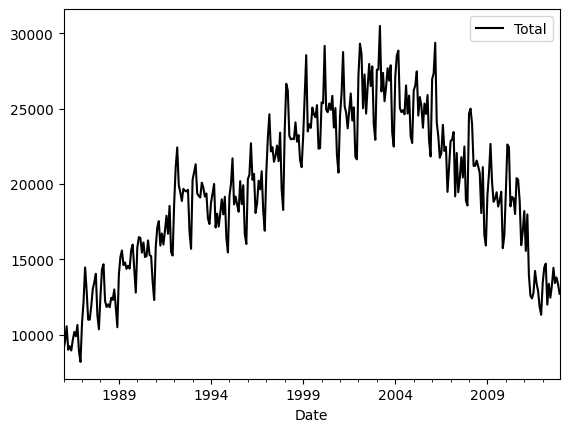

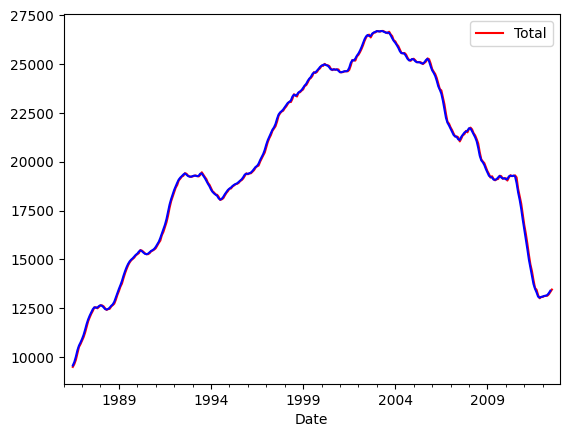

In [45]:
fish.plot(color="black")
fish.rolling(12, center=True).mean().plot(color="red")
result.trend.plot(color="blue")